In [86]:
#Import our data first using Pandas and Pickle
import os
import pandas

def load_data():
    DATA_NAME = "appml-assignment1-dataset.pkl"
    REF_DIR = "ref"
    data_path = os.path.join(".", REF_DIR, DATA_NAME)
    with open(data_path, "rb") as data_in:
        data = pandas.read_pickle(data_in)
    return [data['X'], data['y']]

[data_features, data_labels] = load_data()
print("What's the size of our feature set?: "+str(data_features.shape))
print("And, of course, how many labels? "+str(data_labels.shape))
print("\nWhat's some of our stats?")
print(data_features.head())
data_features.info()
data_features.describe()

What's the size of our feature set?: (39640, 189)
And, of course, how many labels? (39640,)

What's some of our stats?
                     date  CAD-open  CAD-high   CAD-low  CAD-close  CHF-open  \
18412 2015-01-14 17:15:00  1.195500  1.196065  1.195430   1.195735  1.018795   
14220 2014-05-12 19:00:00  1.089745  1.089975  1.089720   1.089935  0.887755   
36252 2017-11-29 19:00:00  1.286515  1.287155  1.286305   1.286595  0.984525   
13653 2014-04-09 03:00:00  1.092575  1.093375  1.092380   1.092760  0.884270   
49163 2020-01-02 12:00:00  1.299845  1.300430  1.299275   1.299670  0.972185   

       CHF-high   CHF-low  CHF-close  CNH-open  ...  VGK-low  VGK-close  \
18412  1.018870  1.018360   1.018665  6.195550  ...    50.94      51.15   
14220  0.887810  0.887695   0.887785  6.243690  ...    60.68      60.77   
36252  0.984865  0.984180   0.984205  6.615300  ...    58.43      58.44   
13653  0.884315  0.882895   0.883050  6.198035  ...    58.91      58.97   
49163  0.973320  0.972180

CAD-open      CAD-high       CAD-low     CAD-close      CHF-open  \
count  39640.000000  39640.000000  39640.000000  39640.000000  39640.000000   
mean       1.209977      1.210739      1.209219      1.209983      0.960916   
std        0.132527      0.132654      0.132395      0.132525      0.036159   
min        0.964425      0.965500      0.964150      0.965125      0.849125   
25%        1.072693      1.073121      1.072319      1.072730      0.933475   
50%        1.272825      1.273630      1.271975      1.272850      0.968163   
75%        1.318806      1.319645      1.318035      1.318840      0.990840   
max        1.468475      1.468990      1.463805      1.464735      1.033430   

           CHF-high       CHF-low     CHF-close      CNH-open      CNH-high  \
count  39640.000000  39640.000000  39640.000000  36254.000000  36254.000000   
mean       0.961573      0.960231      0.960916      6.501766      6.503579   
std        0.036151      0.036195      0.036163      0.315308      0.315965   
min        0.855985      0.716080      0.839240      6.017270      6.018200   
25%        0.934274      0.932750      0.933525      6.209200      6.210156   
50%        0.968855      0.967440      0.968187      6.483350      6.485518   
75%        0.991405      0.990246      0.990835      6.793290      6.795948   
max        1.033525      1.030845      1.031710      7.194995      7.197400   

       ...       VGK-low     VGK-close      VIX-open      VIX-high  \
count  ...  39627.000000  39627.000000  39627.000000  39627.000000   
mean   ...     52.723365     52.794529     15.186952     15.325475   
std    ...      4.878581      4.870775      3.757955      3.859156   
min    ...     38.470000     38.490000      8.560000      9.050000   
25%    ...     49.000000     49.060000     12.660000     12.730000   
50%    ...     53.180000     53.250000     14.290000     14.400000   
75%    ...     56.600000     56.680000     16.860000     17.030000   
max    ...     63.370000     63.500000     49.210000     49.210000   

            VIX-low     VIX-close      ZCN-open      ZCN-high       ZCN-low  \
count  39627.000000  39627.000000  39608.000000  39608.000000  39608.000000   
mean      15.039155     15.178598     19.580117     19.593662     19.563919   
std        3.661835      3.764417      2.029194      2.029591      2.028042   
min        8.560000      8.960000     15.140000     15.140000     15.140000   
25%       12.580000     12.660000     17.870000     17.910000     17.860000   
50%       14.180000     14.290000     19.960000     19.970000     19.940000   
75%       16.710000     16.850000     21.070000     21.072500     21.050000   
max       49.210000     49.210000     23.810000     23.820000     23.810000   

          ZCN-close  
count  39608.000000  
mean      19.578553  
std        2.028052  
min       15.140000  
25%       17.880000  
50%       19.960000  
75%       21.070000  
max       23.810000  

[8 rows x 188 columns]

<Figure size 432x288 with 0 Axes>

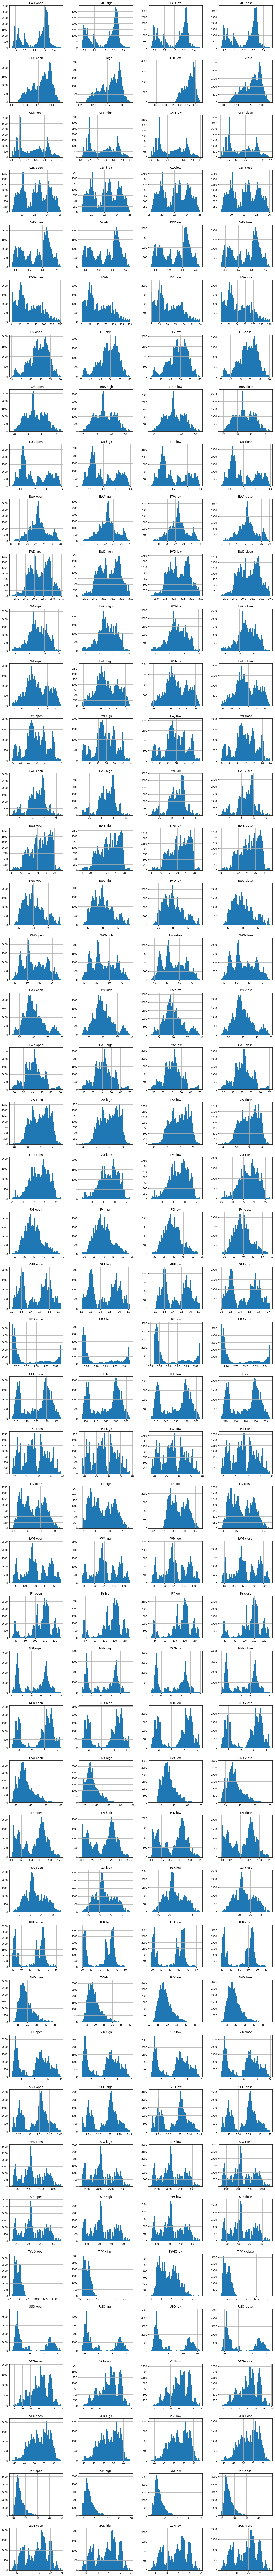

In [87]:
#Plot some histograms of all the data (sorted by index/exchange)
%matplotlib inline
import matplotlib.pyplot as plt

figure = plt.figure()
histogram = data_features.hist(bins=50, column=data_features.dtypes[1:].index, figsize=(20,200), layout=(47, 4))
figure.tight_layout()

In [88]:
#Get an idea about how correlated some of these values are
correlation_matrix = data_features.corr()

from pandas.plotting import scatter_matrix
DELIMETER = "-"

etf_titles = set([x.split(DELIMETER)[0] for x in data_features.dtypes[1:].index])
etf_stat = set([x.split(DELIMETER)[1] for x in data_features.dtypes[1:].index])

open_attributes = []
high_attributes = []
low_attributes = []
close_attributes = []

for stat in etf_stat:
    for etf in etf_titles:
        if stat == 'open':
            open_attributes.append(etf+DELIMETER+stat)
        elif stat == 'high':
            high_attributes.append(etf+DELIMETER+stat)
        elif stat == 'low':
            low_attributes.append(etf+DELIMETER+stat)
        elif stat == 'close':
            close_attributes.append(etf+DELIMETER+stat)
        else:
            pass

#Now scatter!
open_corr = data_features[open_attributes].corr()
print("Opening Correlations\n", open_corr)
high_corr = data_features[high_attributes].corr()
print("High Correlations\n", high_corr)
low_corr = data_features[low_attributes].corr()
print("Low Correlations\n", low_corr)
close_corr = data_features[close_attributes].corr()
print("Closing Correlations\n", close_corr)

Opening Correlations
             JPY-open  MXN-open  DVS-open  SEK-open  VGK-open  HXT-open  \
JPY-open    1.000000  0.561945  0.176631  0.647466  0.484303  0.603685   
MXN-open    0.561945  1.000000  0.249220  0.919750  0.117767  0.824080   
DVS-open    0.176631  0.249220  1.000000  0.254083  0.126437  0.267057   
SEK-open    0.647466  0.919750  0.254083  1.000000  0.120330  0.848165   
VGK-open    0.484303  0.117767  0.126437  0.120330  1.000000  0.539485   
HXT-open    0.603685  0.824080  0.267057  0.848165  0.539485  1.000000   
ZCN-open    0.612858  0.707118  0.256995  0.745506  0.656785  0.967049   
EWL-open    0.671080  0.472276  0.226873  0.547414  0.839624  0.828870   
RSX-open   -0.784969 -0.588265 -0.128926 -0.640928 -0.037618 -0.384401   
EUR-open   -0.641042 -0.821916 -0.190679 -0.910104  0.115130 -0.607202   
NOK-open    0.732521  0.925320  0.242290  0.966631  0.150658  0.806721   
TYVIX-open  0.291068 -0.293091  0.009348 -0.125123 -0.576676 -0.595500   
EWZ-open   -0.79

In [89]:
# Find the other exchanges that are most correlated with CAD (Canadian Exchange)

def find_top_n_correlations(match_string, correlation_matrix, num):
    search_dict = correlation_matrix[match_string]
    sorted_score_idxs = [scores for scores in reversed(sorted(range(len(search_dict)), key=lambda k:search_dict[k]))][1:]
    scores = []
    temp_scores = []
    etfs = []
    temp_etfs = []
    top_cursor = 0
    bottom_cursor = len(sorted_score_idxs)-1
    for i in range(num):
        if abs(search_dict[sorted_score_idxs[top_cursor]]) >= abs(search_dict[sorted_score_idxs[bottom_cursor]]):
            top_cursor = top_cursor + 1
            next_score = search_dict[sorted_score_idxs[top_cursor]]
            next_etf = search_dict.keys()[sorted_score_idxs[top_cursor]]
        else:
            next_score = search_dict[sorted_score_idxs[bottom_cursor]]
            next_etf = search_dict.keys()[sorted_score_idxs[bottom_cursor]]
            bottom_cursor = bottom_cursor - 1
        temp_scores.append(next_score)
        temp_etfs.append(next_etf)
        if len(temp_scores) >= num:
            break
    final_sort_idxs = [scores for scores in reversed(sorted(range(len(temp_scores)), key=lambda k:abs(temp_scores[k])))]
    for idx in final_sort_idxs:
        scores.append(temp_scores[idx])
        etfs.append(temp_etfs[idx])
    return [scores, etfs]

top_n = 10
# Seems that no matter the price, the correlation persists per country
[top_scores_open, top_etfs_open] = find_top_n_correlations('CAD-open', open_corr, top_n)
print("Top Correlations [OPEN]\n", top_scores_open, "\n", top_etfs_open)
[top_scores_high, top_etfs_high] = find_top_n_correlations('CAD-high', high_corr, top_n)
print("\nTop Correlations [HIGH]\n", top_scores_high, "\n", top_etfs_high)
[top_scores_low, top_etfs_low] = find_top_n_correlations('CAD-low', low_corr, top_n)
print("\nTop Correlations [LOW]\n", top_scores_low, "\n", top_etfs_low)
[top_scores_close, top_etfs_close] = find_top_n_correlations('CAD-close', close_corr, top_n)
print("\nTop Correlations [CLOSE]\n", top_scores_close, "\n", top_etfs_close)


Top Correlations [OPEN]
 [0.965274426181301, -0.9484540587013851, 0.9435168572435884, 0.9396322093696018, 0.9282553365771502, 0.9138462678923649, 0.8940608384715526, 0.8822549735404972, -0.8806830849526012, 0.8421935857869128] 
 ['RUB-open', 'USO-open', 'SGD-open', 'HUF-open', 'SEK-open', 'MXN-open', 'PLN-open', 'DKK-open', 'EUR-open', 'CZK-open']

Top Correlations [HIGH]
 [0.9650226407862212, -0.9485102373869154, 0.943175582123054, 0.9392717325178364, 0.9280240672398671, 0.9135707762208816, 0.8934835122611565, 0.8819365819961433, -0.8813465868437793, 0.8419088023729256] 
 ['RUB-high', 'USO-high', 'SGD-high', 'HUF-high', 'SEK-high', 'MXN-high', 'PLN-high', 'DKK-high', 'EUR-high', 'CZK-high']

Top Correlations [LOW]
 [0.9655713634561355, -0.9483474557017315, 0.9438575455597276, 0.9400310558319681, 0.9285084963359268, 0.9141264806786807, 0.8946462370956519, 0.8826425327379885, -0.8800316530648759, 0.8425628298282399] 
 ['RUB-low', 'USO-low', 'SGD-low', 'HUF-low', 'SEK-low', 'MXN-low', 'P

In [90]:
#Let's look at the scatter of the top 5 for the open

plot_top_n = 10

plot_on = False

if plot_on:
    scatter_matrix(data_features[['CAD-open']+top_etfs_open[0:plot_top_n]], figsize=(15, 11))

In [91]:
#Let's look at the scatter of the top 5 for the high
if plot_on:
    scatter_matrix(data_features[['CAD-high']+top_etfs_high[0:plot_top_n]], figsize=(15, 11))

In [92]:
#Let's look at the scatter of the top 5 for the low
if plot_on:
    scatter_matrix(data_features[['CAD-low']+top_etfs_low[0:plot_top_n]], figsize=(15, 11))

In [93]:
#Let's look at the scatter of the top 5 for the close
if plot_on:
    scatter_matrix(data_features[['CAD-close']+top_etfs_close[0:plot_top_n]], figsize=(15, 11))

In [108]:
# data_features_trimmed = data_features[['CAD-close']+['CAD-high']+['CAD-low']+['CAD-open']+\
#     top_etfs_close[0:plot_top_n]+top_etfs_high[0:plot_top_n]+top_etfs_low[0:plot_top_n]+top_etfs_open[0:plot_top_n]]
data_features_trimmed = data_features[['CAD-close']+['CAD-high']+['CAD-low']+['CAD-open']]
# data_features_trimmed = data_features[\
#     top_etfs_close[0:plot_top_n]+top_etfs_high[0:plot_top_n]+top_etfs_low[0:plot_top_n]+top_etfs_open[0:plot_top_n]]
# data_features_trimmed = data_features[['CAD-close']+['CAD-high']+['CAD-low']+['CAD-open']+\
#     ['VIX-close']+['VIX-high']+['VIX-low']+['VIX-open']]
# data_features_trimmed = data_features[\
#     ['VIX-close']+['VIX-high']+['VIX-low']+['VIX-open']]
data_features_trimmed = data_features_trimmed.dropna()
data_labels_trimmed = data_labels[[x+1 for x in list(data_features_trimmed.index)]]
data_features_trimmed

CAD-close  CAD-high   CAD-low  CAD-open
18412   1.195735  1.196065  1.195430  1.195500
14220   1.089935  1.089975  1.089720  1.089745
36252   1.286595  1.287155  1.286305  1.286515
13653   1.092760  1.093375  1.092380  1.092575
49163   1.299670  1.300430  1.299275  1.299845
...          ...       ...       ...       ...
13544   1.102630  1.103120  1.102365  1.102880
24384   1.383215  1.384600  1.382795  1.382800
32148   1.340195  1.340570  1.340165  1.340350
27276   1.278410  1.279525  1.278220  1.278885
20993   1.233460  1.233640  1.231470  1.231620

[39640 rows x 4 columns]

In [109]:
#Let's preprocess our data with a Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_features_trimmed)
data_features_trimmed_scale = scaler.transform(data_features_trimmed)
data_features_trimmed_scale

array([[-0.10751073, -0.11061658, -0.10414984, -0.10923692],
       [-0.90585848, -0.91037497, -0.90260548, -0.90723585],
       [ 0.57810248,  0.57606446,  0.58225312,  0.57753791],
       ...,
       [ 0.98255843,  0.9787329 ,  0.98907197,  0.98376242],
       [ 0.51633994,  0.51854579,  0.52118497,  0.51996398],
       [ 0.17715533,  0.17264218,  0.16806983,  0.16331493]])

31712
Reached minimum: Train Length = 456


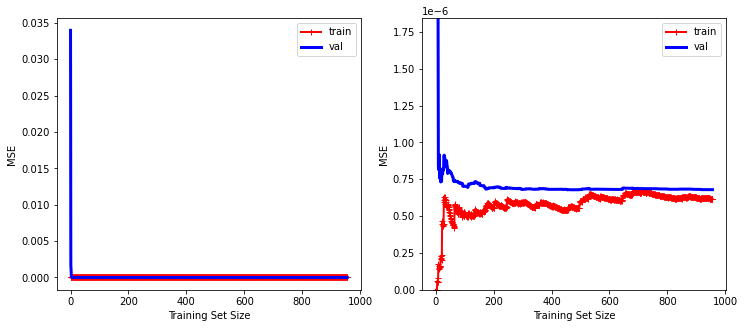

In [111]:
#Playing around with a few models (utilizing early stopping)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.base import clone
import numpy as np

def calc_learning_curves(model, X, y):
    minimum_val_error = float("inf")
    best_train_length = None
    best_model = None
    since_last_decrease = 0
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=613)
    train_errors, val_errors = [], []
    print(len(X_train))
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_error = mean_squared_error(y_train[:m], y_train_predict)
        val_error = mean_squared_error(y_val, y_val_predict)
        if val_error < minimum_val_error:
            since_last_decrease = 0
            minimum_val_error = val_error
            best_train_length = m
            best_model = clone(model)
        else:
            since_last_decrease = since_last_decrease + 1
        train_errors.append(train_error)
        val_errors.append(val_error)
        if since_last_decrease > 500:
            print("Reached minimum: Train Length = "+str(best_train_length))
            break
    return train_errors, val_errors
    
# best_model.fit(X_train_poly_scaled, y_train)

lin_reg = LinearRegression(normalize=False, n_jobs=4)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
svm_reg = LinearSVR(epsilon=0)

#Pick a model
model = lin_reg #Appears to be the most consistent model
# model = sgd_reg
# model = svm_reg

train, validate = calc_learning_curves(model, data_features_trimmed_scale, data_labels_trimmed)
fig = plt.figure(1, figsize=(12, 5))

fig.add_subplot(121)
plt.plot(train, "r-+", linewidth=2, label="train")
plt.plot(validate, "b-", linewidth=3, label="val")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()

fig.add_subplot(122)
plt.plot(train, "r-+", linewidth=2, label="train")
plt.plot(validate, "b-", linewidth=3, label="val")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.ylim([0, min(validate)+(sum(train)/len(train))*2])
plt.legend()